In [5]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = np.load("./mnist_train_small.npy")

In [3]:
data.shape

(19999, 785)

In [4]:
X = data[:, 1:]
y = data[:, 0]

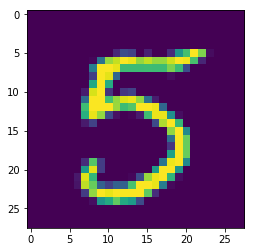

In [7]:
plt.imshow(X[0].reshape(28,28))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [9]:
model = KNeighborsClassifier()

In [10]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [12]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [13]:
model.score(X_test[:100], y_test[:100])

0.95

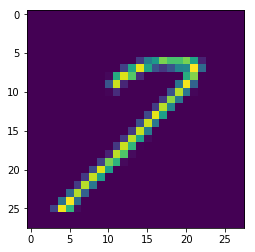

In [14]:
plt.imshow(X_test[0].reshape(28,28))

In [15]:
class KNNCustom:
    
    def __init__(self, n_neighbours=5):
        self.n_neighbours=n_neighbours
    def fit(self, X, y):
        self.X = X
        self.y = y
    def predict_point(self, point):
        distance = []
        for x_point, y_point in zip(self.X,self.y):
            dist = (((x_point - point)**2).sum())**(1/2)
            distance.append([dist,y_point])
        top = sorted(distance, key = lambda x: x[0])[:self.n_neighbours]
        data, counts=np.unique(np.array(top)[:,1], return_counts=True)
        return int(data[np.argmax(counts)])
    def predict_points(self, arr):
        result = []
        for i in range(arr.shape[0]):
            result.append(self.predict_point(arr[i]))
        return np.array(result)
    def accuracy(self, X_test, y_test):
        result = self.predict_points(X_test)
        return (result==y_test).sum()/y_test.shape[0]
        

In [22]:
m2=KNNCustom()

In [23]:
m2.fit(X_train, y_train)

In [25]:
m2.predict_points(X_test[:10])

array([2, 1, 1, 1, 1, 1, 4, 1, 1, 1])

In [24]:
m2.accuracy(X_test[:100], y_test[:100])

0.19

In [30]:
n = int(input())
arr = list(map(int, input().split()))
X = int(input())
arr.sort()
z=(n-X)//2
cut = arr[z:X+z]
print(cut)
count = 0
for i in range(1,len(cut)):
    count+=cut[i]-cut[0]
print(count)

[1, 3, 9]
10
